## Decision trees

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Training a decision tree using sklearn

(150, 2)


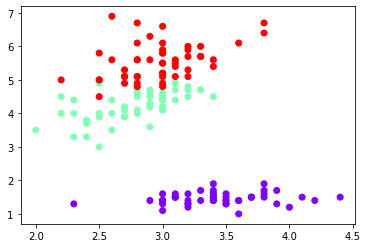

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:,1:3]
y = data.target

print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow');

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.964
Accuracy on test set: 0.921


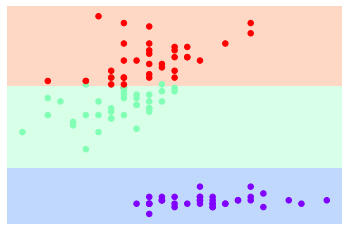

In [4]:
visualize_classifier(tree, X_train, y_train)

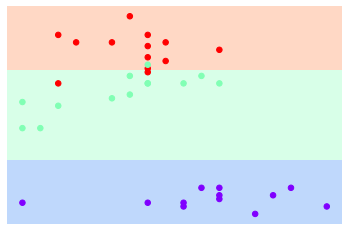

In [5]:
visualize_classifier(tree, X_test, y_test)

### Visualizing Decision Tree

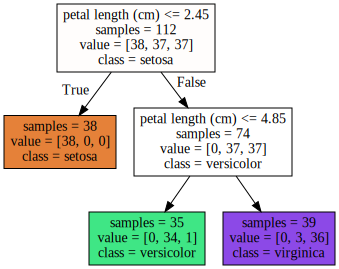

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=data.target_names,
                feature_names=data.feature_names[1:3], impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Controlling complexity of decision trees

Accuracy on training set: 0.982
Accuracy on test set: 0.895


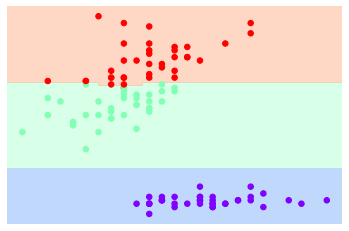

In [7]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

visualize_classifier(tree, X_train, y_train)

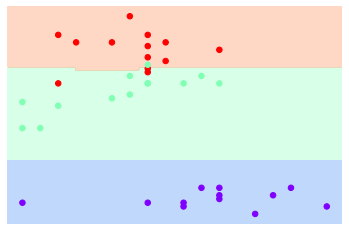

In [8]:
visualize_classifier(tree, X_test, y_test)

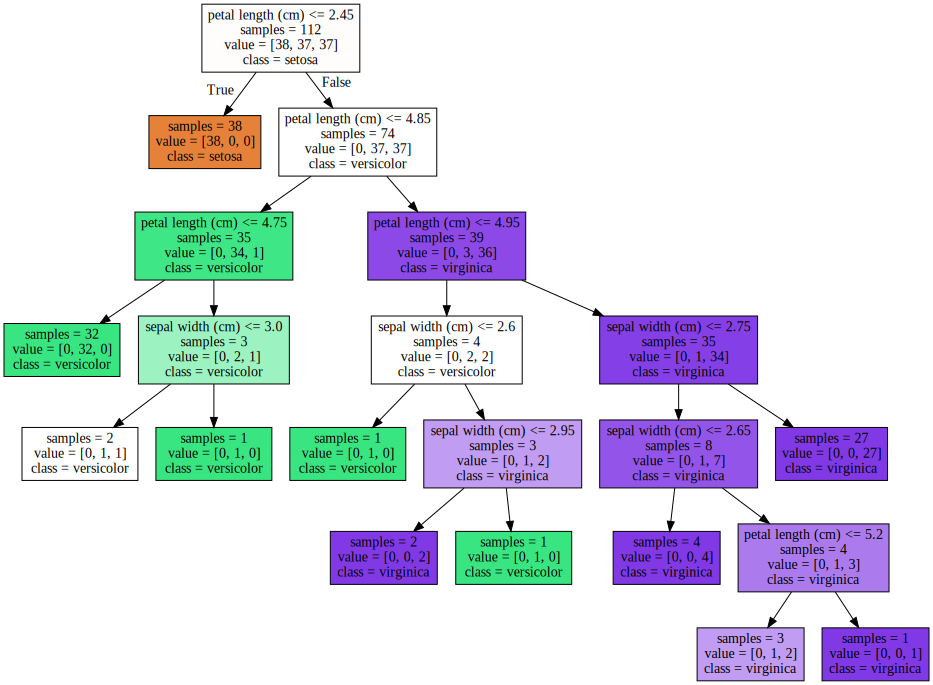

In [9]:
export_graphviz(tree, out_file="tree.dot", class_names=data.target_names,
                feature_names=data.feature_names[1:3], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Search for the best max_depth

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Best depth parameter of the tree: 2
Accuracy on training set: 0.964
Accuracy on test set: 0.921


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:    1.2s finished


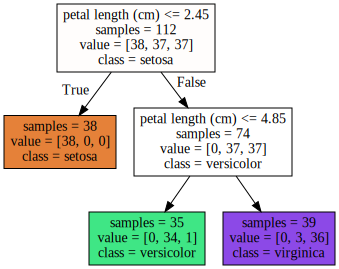

In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.linspace(1, 20, 20)}
tree = DecisionTreeClassifier(random_state=0)
    
cmodel = GridSearchCV(tree, parameters, cv = 3, verbose=5, n_jobs = 5)
cmodel.fit(X_train, y_train.ravel())
print('Best depth parameter of the tree: {:.0f}'.format(cmodel.best_params_['max_depth']))
    
tree = DecisionTreeClassifier(max_depth=cmodel.best_params_['max_depth'], random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

export_graphviz(tree, out_file="tree.dot", class_names=data.target_names,
                feature_names=data.feature_names[1:3], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))